In [71]:
import pandas as pd
import numpy as np

In [72]:
df = pd.read_csv(r"PhiUSIIL_Phishing_URL_Dataset_lang.csv")

In [73]:
df

,Unnamed: 0,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,Title_Cleaned,Language
0,0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,1,34,20,28,119,0,124,1,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...,vi
1,1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,1,50,9,8,39,0,217,1,johannes gutenberg-universitã¤t mainz,de
2,2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,1,10,2,7,42,2,5,1,voice fm southampton,en
3,3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,3,27,15,22,1,31,1,home page: seminars in fetal and neonatal medi...,it
4,4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,244,15,34,72,1,85,1,fundaciã³n rewilding argentina,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,235790,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,51,7,21,187,2,191,1,skincareliving,sl
235791,235791,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,0,50,1,7,88,0,31,1,winchestergov,en
235792,235792,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,1,27,10,30,58,2,67,1,nononsensedesign,it
235793,235793,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,3,0,0,0,0,patient-cell-fupdatedlogmyloginworkers,nl


In [ ]:
columns_to_drop = [
    'Unnamed: 0', 
    'Title_Cleaned',
    'ObfuscationRatio',
    'NoOfLettersInURL',
    'NoOfDegitsInURL',
    'DegitRatioInURL',
    'NoOfEqualsInURL',
    'NoOfAmpersandInURL',
    'NoOfOtherSpecialCharsInURL',
    'SpacialCharRatioInURL',
    'URLTitleMatchScore',
    'NoOfExternalRef',
    'IsDomainIP',
    'TLDLegitimateProb',
    'TLDLength',
    'NoOfSubDomain',
    'HasObfuscation',
    'NoOfObfuscatedChar',
    'NoOfQMarkInURL',
    'LargestLineLength',
    'NoOfPopup',
    'HasExternalFormSubmit',
    'HasPasswordField',
    'Bank',
    'Crypto',
    'NoOfCSS',
    'NoOfEmptyRef',
    'HasTitle',
    'LineOfCode',
    'DomainTitleMatchScore',
    'Title',
    'Domain',
    'TLD',
    'URL',
    'URLSimilarityIndex',
    'URLCharProb', 
    'HasSocialNet',  
    'HasCopyrightInfo',
] # from earlier EDA

In [75]:
df = df.drop(columns=columns_to_drop)

In [76]:
features = df.columns.to_list()
features.remove('label')

In [77]:
features

['URLLength',
 'DomainLength',
 'CharContinuationRate',
 'LetterRatioInURL',
 'IsHTTPS',
 'HasFavicon',
 'Robots',
 'IsResponsive',
 'NoOfURLRedirect',
 'NoOfSelfRedirect',
 'HasDescription',
 'NoOfiFrame',
 'HasSubmitButton',
 'HasHiddenFields',
 'Pay',
 'NoOfImage',
 'NoOfJS',
 'NoOfSelfRef',
 'Language']

In [78]:
len(features)

19

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

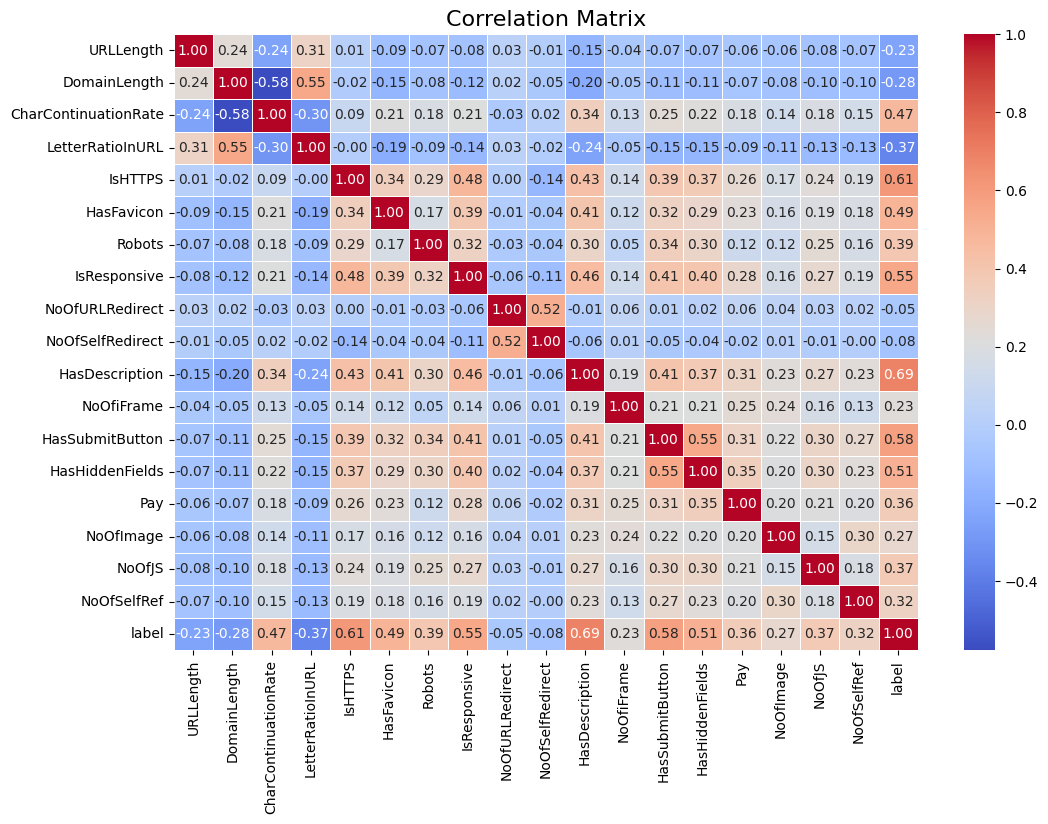

In [80]:
# Subset the DataFrame to only include the listed columns
df_subset = df[features + ['label']]

# Ensure only numeric columns are used for correlation
df_subset_numeric = df_subset.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = df_subset_numeric.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [81]:
corr_pairs = correlation_matrix.unstack()
sorted_corr_pairs = corr_pairs.abs().sort_values(ascending=False)

# Remove self-correlation (correlation of a feature with itself, which is always 1)
sorted_corr_pairs = sorted_corr_pairs[sorted_corr_pairs < 1]

# Display the top correlation values (you can adjust the number of top values)
top_corr_pairs = sorted_corr_pairs.head(10)

# Print the top correlation pairs
print("Top Correlation Pairs:")
print(top_corr_pairs)

Top Correlation Pairs:
label                 HasDescription          0.690232
HasDescription        label                   0.690232
IsHTTPS               label                   0.609132
label                 IsHTTPS                 0.609132
HasSubmitButton       label                   0.578561
label                 HasSubmitButton         0.578561
DomainLength          CharContinuationRate    0.577425
CharContinuationRate  DomainLength            0.577425
HasSubmitButton       HasHiddenFields         0.550134
HasHiddenFields       HasSubmitButton         0.550134
dtype: float64


In [82]:
label_correlation = correlation_matrix['label'].sort_values(ascending=False)

# Remove self-correlation (correlation of the label with itself, which is always 1)
label_correlation = label_correlation[label_correlation < 1]

# Display the correlations with the label
print("Correlations with the label:")
print(label_correlation)

Correlations with the label:
HasDescription          0.690232
IsHTTPS                 0.609132
HasSubmitButton         0.578561
IsResponsive            0.548608
HasHiddenFields         0.507731
HasFavicon              0.493711
CharContinuationRate    0.467735
Robots                  0.392620
NoOfJS                  0.373500
Pay                     0.359747
NoOfSelfRef             0.316211
NoOfImage               0.274658
NoOfiFrame              0.225822
NoOfURLRedirect        -0.046456
NoOfSelfRedirect       -0.076463
URLLength              -0.233445
DomainLength           -0.283152
LetterRatioInURL       -0.367794
Name: label, dtype: float64


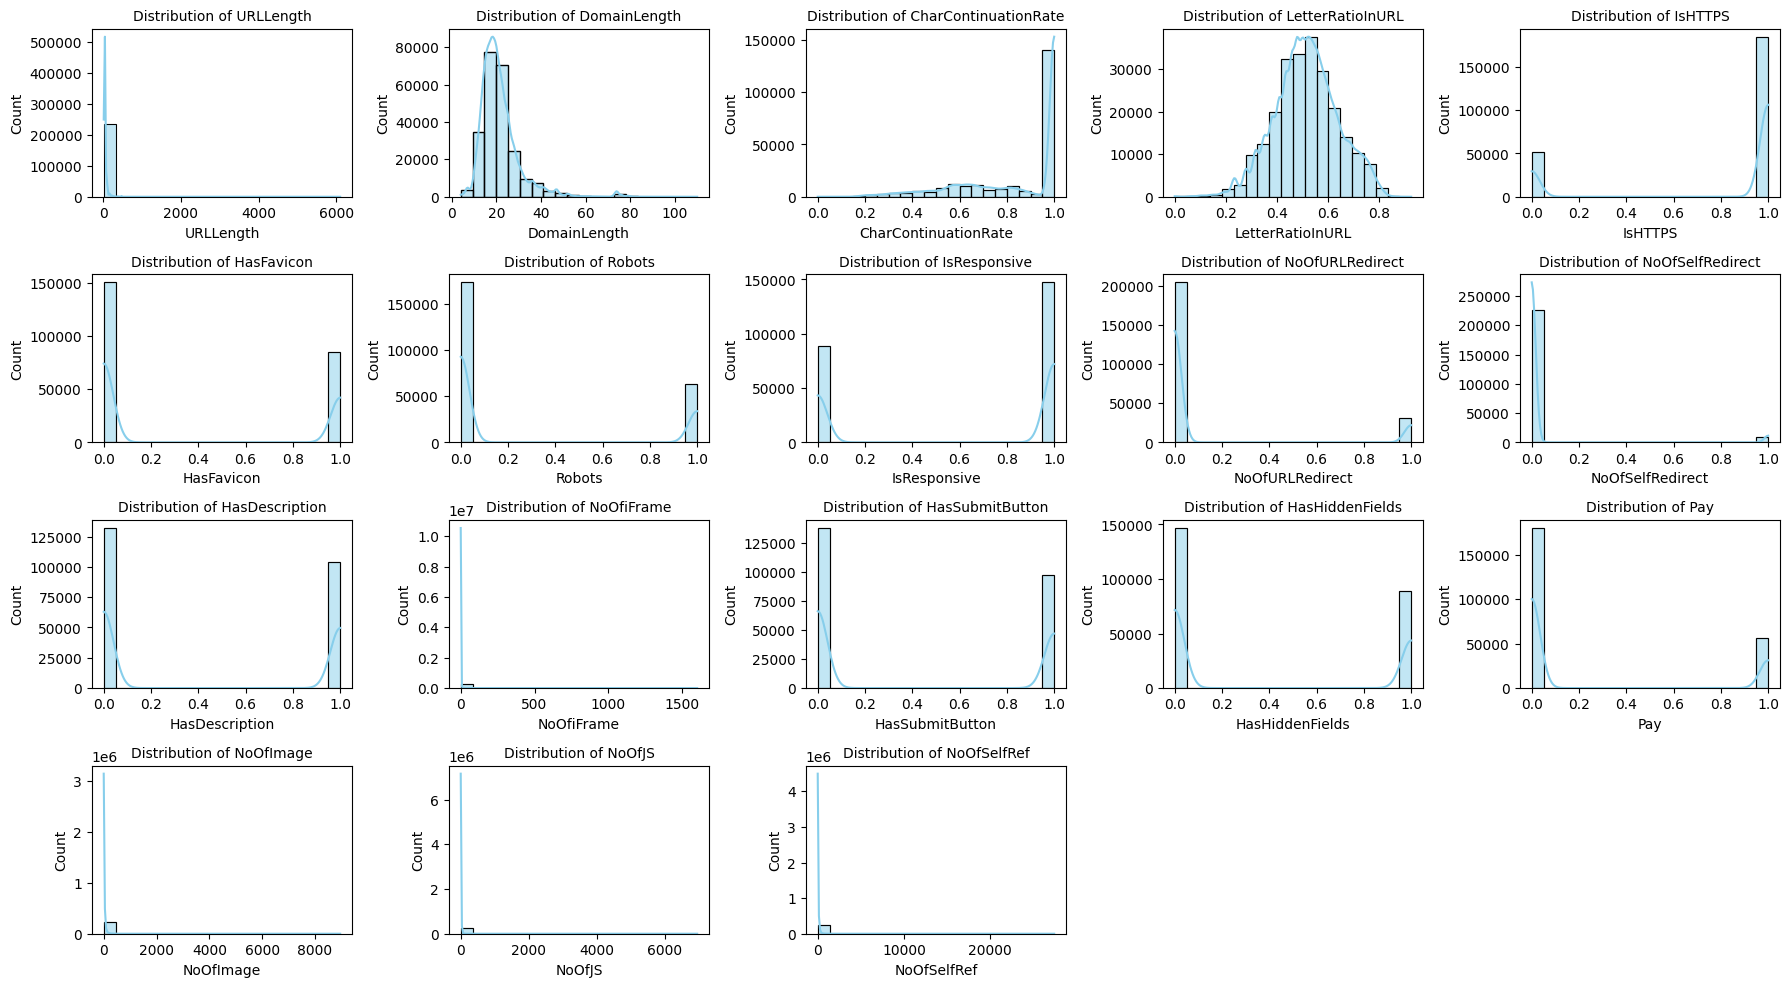

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' containing the listed columns
columns = [
    'URLLength', 'DomainLength', 'CharContinuationRate',  
    'LetterRatioInURL', 'IsHTTPS', 'HasFavicon', 'Robots', 'IsResponsive', 
    'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfiFrame', 
    'HasSubmitButton', 'HasHiddenFields', 'Pay', 
    'NoOfImage', 'NoOfJS', 'NoOfSelfRef', 'Language'
]

# Subset the DataFrame to only include the listed columns
df_subset = df[columns]

# Ensure only numeric columns are used for the distribution
df_subset_numeric = df_subset.select_dtypes(include=['number'])

# Set up the plotting grid
plt.figure(figsize=(18, 12))

# Create histograms (or KDEs) for each feature
for i, column in enumerate(df_subset_numeric.columns, 1):
    plt.subplot(5, 5, i)  # 5 rows and 5 columns subplot grid (you can adjust this as needed)
    sns.histplot(df_subset_numeric[column], kde=True, color='skyblue', bins=20)  # KDE + histogram
    plt.title(f'Distribution of {column}', fontsize=10)
    plt.tight_layout()

# Show the plot
plt.show()

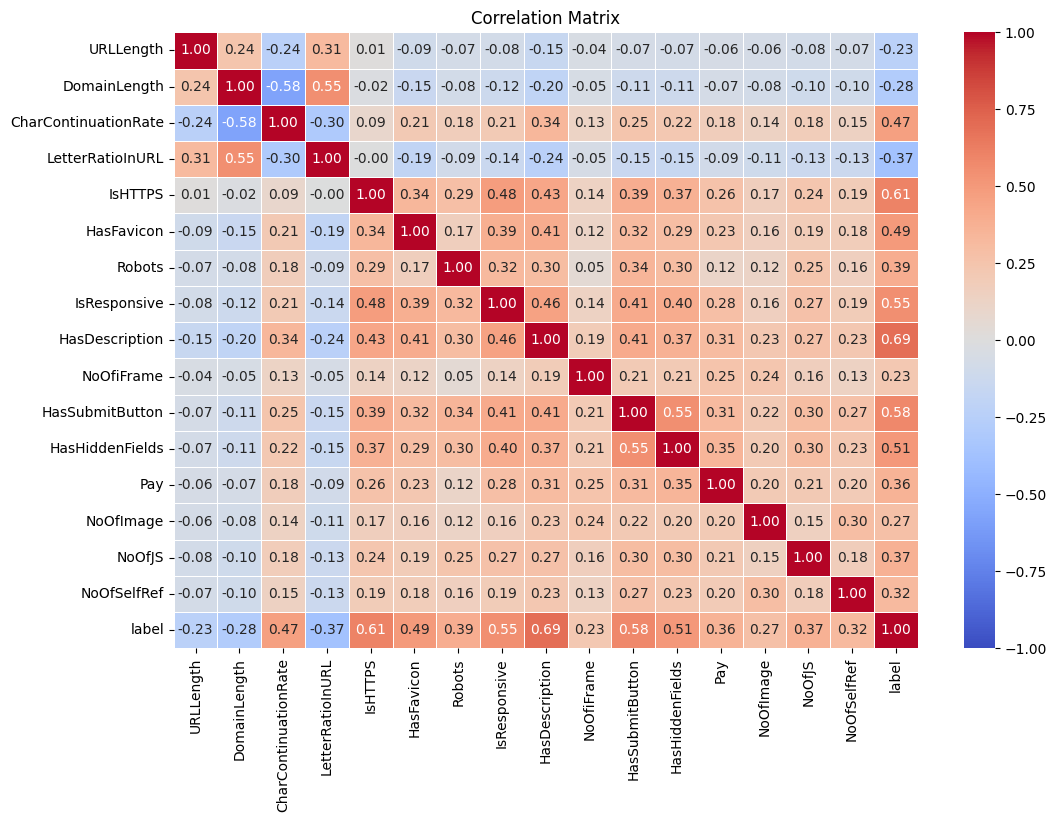

Top Correlated Features with Target:
HasDescription          0.690232
IsHTTPS                 0.609132
HasSubmitButton         0.578561
IsResponsive            0.548608
HasHiddenFields         0.507731
HasFavicon              0.493711
CharContinuationRate    0.467735
Robots                  0.392620
NoOfJS                  0.373500
LetterRatioInURL        0.367794
Pay                     0.359747
NoOfSelfRef             0.316211
DomainLength            0.283152
NoOfImage               0.274658
URLLength               0.233445
NoOfiFrame              0.225822
Name: label, dtype: float64


In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is the DataFrame and 'label' is the target column

# Subset the data to include only the selected feature columns
feature_columns = [
    'URLLength',              
    'DomainLength',           
    'CharContinuationRate', 
    'LetterRatioInURL', 
    'IsHTTPS', 
    'HasFavicon', 
    'Robots', 
    'IsResponsive', 
    'HasDescription', 
    'NoOfiFrame',             
    'HasSubmitButton', 
    'HasHiddenFields', 
    'Pay', 
    'NoOfImage',               
    'NoOfJS', 
    'NoOfSelfRef',
    'Language',
    'label'
]

# Subset the data
df_subset = df[feature_columns]

df_subset = df_subset.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# Extract correlations with the target variable ('label')
target_corr = correlation_matrix['label'].drop('label')  # Drop the label itself to avoid self-correlation

# Sort by absolute correlation values and display top correlated features
top_correlated_features = target_corr.abs().sort_values(ascending=False)

# Print top correlated features with the target
print("Top Correlated Features with Target:")
print(top_correlated_features)

## Model

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- 1. Data Loading and Preparation ---
TARGET_COLUMN = 'label'         


# Define the features you've selected
feature_columns = [
    'URLLength',              
    'DomainLength',           
    'CharContinuationRate', 
           
    'LetterRatioInURL', 
    'IsHTTPS', 
    'HasFavicon', 
    'Robots', 
    'IsResponsive', 

    'NoOfURLRedirect',        
    'NoOfSelfRedirect',
     
    'HasDescription', 
    'NoOfiFrame',             
           
    'HasSubmitButton', 
    'HasHiddenFields', 
    'Pay', 
       
    'NoOfImage',               
    'NoOfJS', 
    'NoOfSelfRef',
    'Language'
]

# Separate features (X) and target (y)
X = df[feature_columns]
y = df[TARGET_COLUMN]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# --- 2. Create the ADVANCED Preprocessor (with Skew Handling) ---

# Identify numerical and categorical features
numerical_features = [col for col in feature_columns if col != 'Language']
categorical_features = ['Language']

# Create a processing pipeline for the numerical data.
# This new pipeline first transforms data to be more Gaussian-like (handling skew)
# and then scales it.
numerical_transformer = Pipeline(steps=[
    ('power', PowerTransformer(method='yeo-johnson')), # Step 1: Handle skew and transform to be more normal
    ('scaler', StandardScaler())                      # Step 2: Scale data to mean 0, variance 1
])

# Create the final column transformer that applies different steps to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

### Logistic Regression

In [86]:
# --- 3. Create and Train the Logistic Regression Pipeline ---

# Create the full pipeline by combining the advanced preprocessor and the model
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))
])

# Train the model
print("Training the Logistic Regression model with skew normalization...")
lr_pipeline.fit(X_train, y_train)
print("Training complete.\n")

# --- 4. Model Performance Evaluation ---

# Make predictions on the test set
y_pred = lr_pipeline.predict(X_test)
y_pred_proba = lr_pipeline.predict_proba(X_test)[:, 1]

# Basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"AUC-ROC:   {auc_score:.4f}")

# Print the classification report
print("="*60)
print("Model Performance (with Skew Transformation)")
print("="*60)
print(classification_report(y_test, y_pred, target_names=['Legit (0)', 'Phishing (1)']))



Training the Logistic Regression model with skew normalization...
Training complete.

Accuracy:  0.9965
Precision: 0.9978
Recall:    0.9961
F1-Score:  0.9970
AUC-ROC:   0.9999
Model Performance (with Skew Transformation)
              precision    recall  f1-score   support

   Legit (0)       0.99      1.00      1.00     30284
Phishing (1)       1.00      1.00      1.00     40455

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739



##### Visualisations

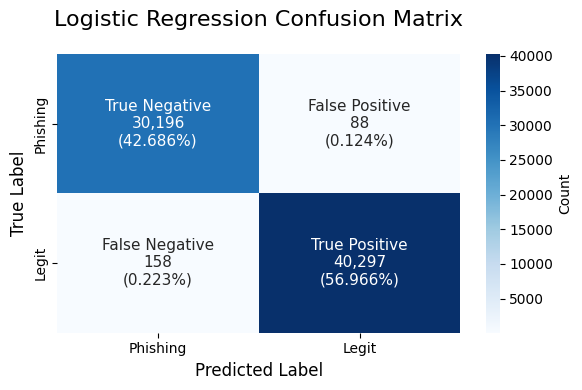

In [87]:
# Confusion Matrix
# Calculate percentages
lr_cm = confusion_matrix(y_test, y_pred)
lr_cm_percent = lr_cm.astype('float') / lr_cm.sum() * 100

# Create custom annotations with counts, percentages, and labels
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
annotations = []

for i in range(2):
    for j in range(2):
        count = lr_cm[i, j]
        percentage = lr_cm_percent[i, j]
        label_idx = i * 2 + j
        label = labels[label_idx]
        
        # Create multi-line annotation
        annotation = f'{label}\n{count:,}\n({percentage:.3f}%)'
        annotations.append(annotation)

# Reshape annotations to match confusion matrix shape
annotations = np.array(annotations).reshape(2, 2)

# Create heatmap with custom annotations
plt.figure(figsize=(6,4))
sns.heatmap(lr_cm, 
           annot=annotations, 
           fmt='', 
           cmap='Blues', 
           xticklabels=['Phishing', 'Legit'], 
           yticklabels=['Phishing', 'Legit'],
           cbar_kws={'label': 'Count'},
           annot_kws={'fontsize': 11, 'ha': 'center', 'va': 'center'})

plt.title('Logistic Regression Confusion Matrix', fontsize=16, pad=20)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

plt.tight_layout()
plt.show()



C:\Users\erica\AppData\Local\Temp\ipykernel_37264\2799135187.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='vlag')


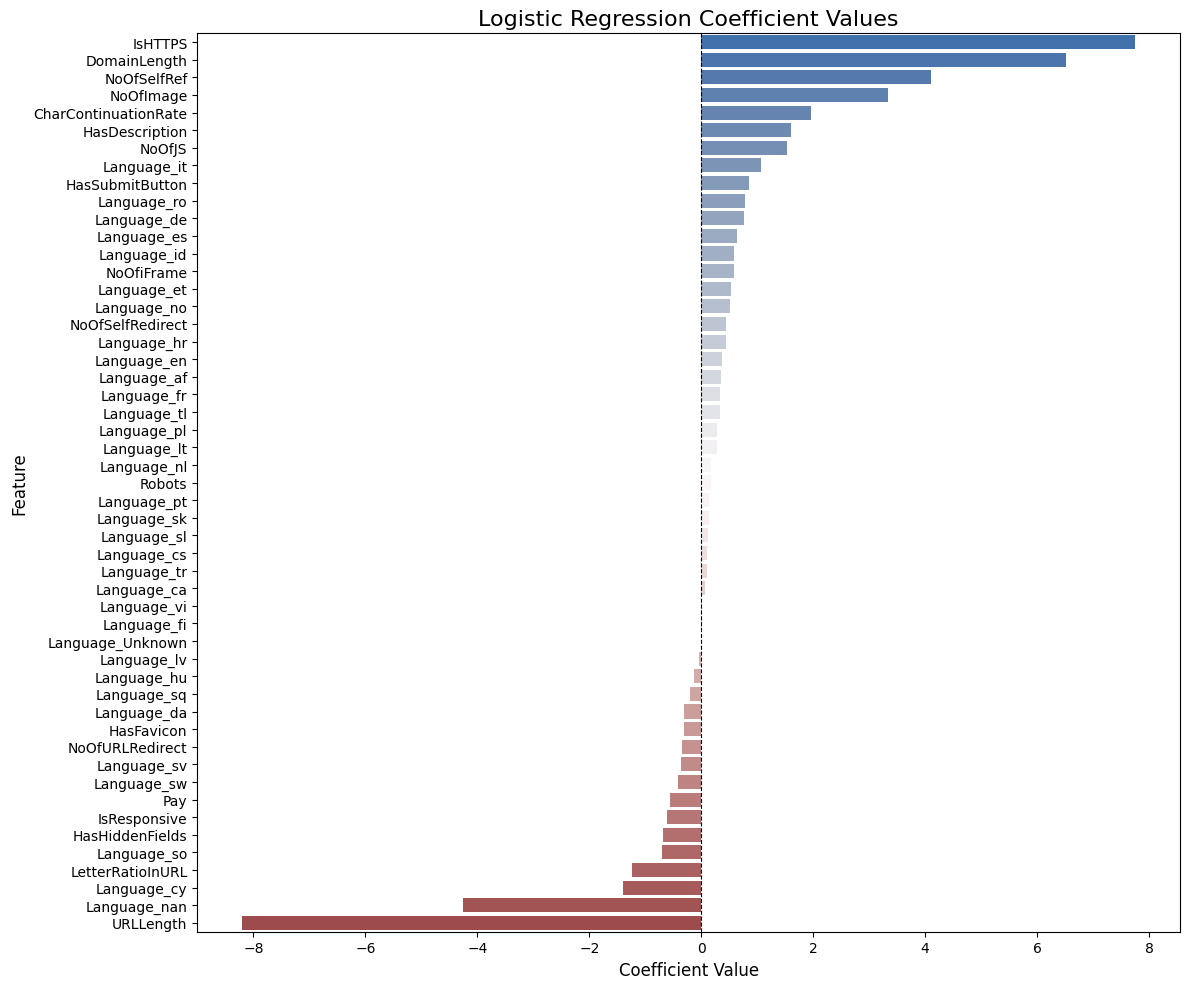

In [88]:
# Coefficient Value Graph
# Get feature names after all transformations
ohe_feature_names = lr_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, ohe_feature_names])

# Get coefficients from the trained classifier step in the pipeline
coefficients = lr_pipeline.named_steps['classifier'].coef_[0]

# Create a dataframe for visualization
coeff_df = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='vlag')
plt.title('Logistic Regression Coefficient Values', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.axvline(x=0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()
plt.show()


C:\Users\erica\AppData\Local\Temp\ipykernel_37264\360459782.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coeff_df_filtered, palette=coeff_df_filtered['Color'].tolist())


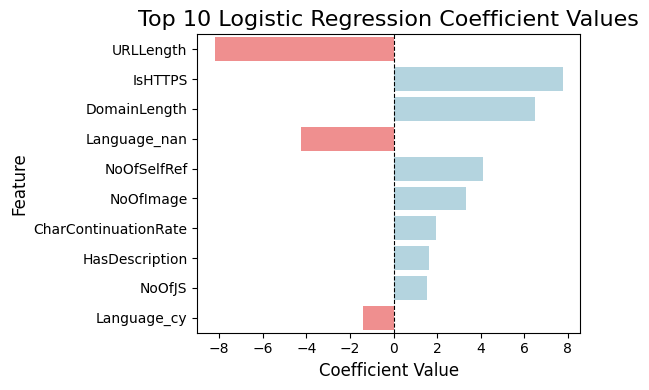

In [89]:
# Feature Importance Graph (Absolute Coefficient Values)

# Add a column with absolute coefficient values for sorting
coeff_df['abs_coefficient'] = coeff_df['Coefficient'].abs()

# Filter and sort to focus on top 10 features with the highest absolute coefficient values
coeff_df_filtered = coeff_df.sort_values(by='abs_coefficient', ascending=False).head(10)

# Set color palette based on the sign of the coefficient (blue for positive, red for negative)
coeff_df_filtered['Color'] = coeff_df_filtered['Coefficient'].apply(lambda x: '#ADD8E6' if x > 0 else '#FF7F7F')

# Plot the top 10 features with customized colors
plt.figure(figsize=(6,4))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df_filtered, palette=coeff_df_filtered['Color'].tolist())

# Title and labels
plt.title('Top 10 Logistic Regression Coefficient Values', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Add a vertical line at x=0 to distinguish positive and negative coefficients
plt.axvline(x=0, color='black', linewidth=0.8, linestyle='--')

# Tight layout to avoid clipping
plt.tight_layout()
plt.show()

#### Save the model files 

In [90]:
# --- 6. Save the Trained Model to a File ---
import joblib
import os

# Define the folder name
folder_name = 'model_artifacts'

# Check if the folder exists, if not, create it
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
model_filename = folder_name + '/phishing_detection_LR_model.pkl'

print(f"\nSaving the trained pipeline to {model_filename}...")
joblib.dump(lr_pipeline, model_filename)
print(f"Model saved successfully!")


Saving the trained pipeline to model_artifacts/phishing_detection_LR_model.pkl...
Model saved successfully!


### XGBoost

In [91]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer


# --- 3. Hyperparameter Tuning with BayesSearchCV ---

# Calculate the imbalance ratio for scale_pos_weight
imbalance_ratio = 100945 / 134850
print(f"Using scale_pos_weight: {imbalance_ratio:.4f}\n")

# create val dataset to implement early stopping and prevent overfitting 
X_train_xgb, X_val, y_train_xgb, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_val = preprocessor.transform(X_val)

# Define the XGBoost classifier within a pipeline
# This makes sure the preprocessing is part of the cross-validation loop
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(
        objective='binary:logistic',
        early_stopping_rounds=10,
        eval_metric='logloss',
        use_label_encoder=False,
        scale_pos_weight=imbalance_ratio,
        random_state=42
    ))
])


# Step 3: Set up hyperparameter grid
params = {
    'classifier__learning_rate': Real(0.01, 0.3, prior='log-uniform'), 
    'classifier__max_depth': Integer(3, 10),                            
    'classifier__subsample': Real(0.5, 1.0),                            
    'classifier__colsample_bytree': Real(0.5, 1.0),                     
    'classifier__n_estimators': Integer(100, 500),                       
    'classifier__gamma': Real(0, 5)                                     
}

# Step 4: Bayes Search with cross-validation
# Using roc_auc as it's a good metric for imbalanced classification
print("Starting hyperparameter tuning with BayesSearchCV...")
bayes_cv = BayesSearchCV(
                    estimator=xgb_pipeline,
                    search_spaces=[(params,30)],
                    cv=5,
                    n_iter=30,
                    n_jobs=-1,              
                    scoring='roc_auc',     
                    verbose=0,
                    random_state=42
                )
bayes_cv.fit(X_train_xgb, y_train_xgb, classifier__eval_set=[(X_val, y_val)], classifier__verbose=False)


best_xgb_pipeline=bayes_cv.best_estimator_
print("\nHyperparameter tuning complete.")
print(f"Best parameters found: {bayes_cv.best_params_}")
print(f"Best ROC AUC score during CV: {bayes_cv.best_score_:.4f}\n")


# --- 4. Model Evaluation ---

# Make predictions on the test set using the best model
y_pred_xgb = best_xgb_pipeline.predict(X_test)
y_pred_xgb_proba = best_xgb_pipeline.predict_proba(X_test)[:, 1]

# Print the performance metrics in the requested format
print("--- XGBoost Model Performance on Test Set ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_xgb):.4f}")
print(f"AUC-ROC:   {roc_auc_score(y_test, y_pred_xgb_proba):.4f}")
print("---------------------------------------------")

print(classification_report(y_test, y_pred_xgb, target_names=['Legit (0)', 'Phishing (1)']))



Using scale_pos_weight: 0.7486

Starting hyperparameter tuning with BayesSearchCV...


c:\Users\erica\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\callback.py:386: UserWarning: [10:17:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



Hyperparameter tuning complete.
Best parameters found: OrderedDict({'classifier__colsample_bytree': 0.5628510891228556, 'classifier__gamma': 3.302145792928145, 'classifier__learning_rate': 0.11339116805415614, 'classifier__max_depth': 9, 'classifier__n_estimators': 152, 'classifier__subsample': 1.0})
Best ROC AUC score during CV: 1.0000

--- XGBoost Model Performance on Test Set ---
Accuracy:  0.9976
Precision: 0.9978
Recall:    0.9980
F1-Score:  0.9979
AUC-ROC:   1.0000
---------------------------------------------
              precision    recall  f1-score   support

   Legit (0)       1.00      1.00      1.00     30284
Phishing (1)       1.00      1.00      1.00     40455

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739



#### Visualisations

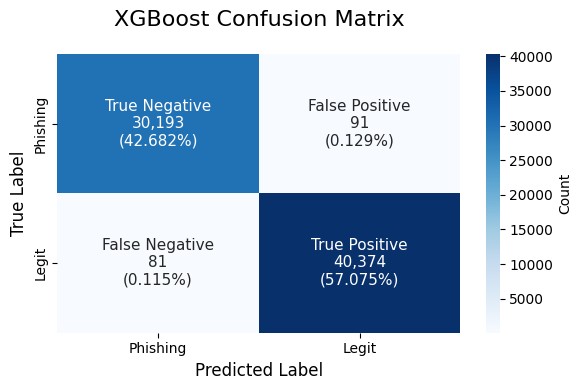

In [92]:
# Confusion Matrix
# Calculate percentages
xgb_cm = confusion_matrix(y_test, y_pred_xgb)
xgb_cm_percent = xgb_cm.astype('float') / xgb_cm.sum() * 100

# Create custom annotations with counts, percentages, and labels
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
annotations = []

for i in range(2):
    for j in range(2):
        count = xgb_cm[i, j]
        percentage = xgb_cm_percent[i, j]
        label_idx = i * 2 + j
        label = labels[label_idx]
        
        # Create multi-line annotation
        annotation = f'{label}\n{count:,}\n({percentage:.3f}%)'
        annotations.append(annotation)

# Reshape annotations to match confusion matrix shape
annotations = np.array(annotations).reshape(2, 2)

# Create heatmap with custom annotations
plt.figure(figsize=(6,4))
sns.heatmap(xgb_cm, 
           annot=annotations, 
           fmt='', 
           cmap='Blues', 
           xticklabels=['Phishing', 'Legit'], 
           yticklabels=['Phishing', 'Legit'],
           cbar_kws={'label': 'Count'},
           annot_kws={'fontsize': 11, 'ha': 'center', 'va': 'center'})
plt.title('XGBoost Confusion Matrix', fontsize=16, pad=20)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

plt.tight_layout()
plt.show()


C:\Users\erica\AppData\Local\Temp\ipykernel_37264\1508578387.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


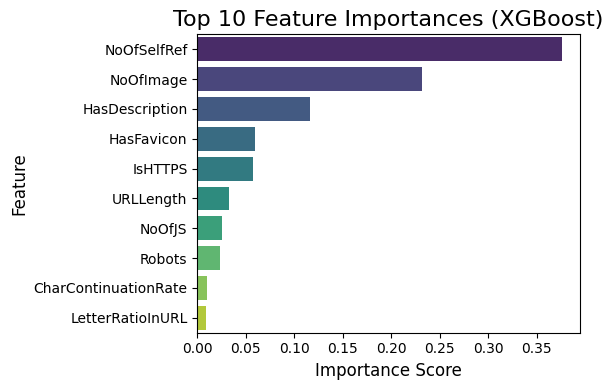

In [93]:
#  Top 10 Feature Importances
# Get feature names after one-hot encoding
ohe_feature_names = best_xgb_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, ohe_feature_names])

# Get importances from the trained XGBoost model in the pipeline
importances = best_xgb_pipeline.named_steps['classifier'].feature_importances_

# Create a dataframe for visualization
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top 10 Feature Importances (XGBoost)', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()



#### Save the model file

In [94]:
# Define the directory and filename
output_dir = 'model_artifacts'
model_filename = 'phishing_detection_XGB_model.pkl'
full_path = os.path.join(output_dir, model_filename)

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save the best pipeline (preprocessor + tuned model)
print(f"\nSaving the best XGBoost pipeline to '{full_path}'...")
joblib.dump(best_xgb_pipeline, full_path)
print("Model saved successfully!")


Saving the best XGBoost pipeline to 'model_artifacts\phishing_detection_XGB_model.pkl'...
Model saved successfully!


### LightGBM

In [95]:
import lightgbm as lgb
# --- Assumes the following variables are already in memory from the previous script ---
# X_train, X_test, y_train, y_test
# preprocessor (the ColumnTransformer object)
# -------------------------------------------------------------------------------------

# --- 1. Define the LightGBM Pipeline and Hyperparameter Grid ---

lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(
        objective='binary',
        random_state=42,
        is_unbalance=True
    ))
])

param_grid_lgbm = {
    'classifier__n_estimators': [200, 400],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__num_leaves': [31, 41],
    'classifier__max_depth': [7, 10],
    'classifier__colsample_bytree': [0.8, 0.9]
}

# --- 2. Perform Hyperparameter Tuning ---

print("Starting LightGBM hyperparameter tuning with GridSearchCV...")
grid_search_lgbm = GridSearchCV(
    estimator=lgbm_pipeline,
    param_grid=param_grid_lgbm,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

grid_search_lgbm.fit(X_train, y_train)

best_lgbm_pipeline = grid_search_lgbm.best_estimator_
print("\nHyperparameter tuning complete.")
print(f"Best LightGBM parameters found: {grid_search_lgbm.best_params_}")
print(f"Best ROC AUC score during CV: {grid_search_lgbm.best_score_:.4f}\n")

# --- 3. Model Evaluation ---

y_pred_lgbm = best_lgbm_pipeline.predict(X_test)
y_pred_proba_lgbm = best_lgbm_pipeline.predict_proba(X_test)[:, 1]

print("--- LightGBM Model Performance on Test Set ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_lgbm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lgbm):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_lgbm):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_lgbm):.4f}")
print(f"AUC-ROC:   {roc_auc_score(y_test, y_pred_proba_lgbm):.4f}")
print("----------------------------------------------")
print(classification_report(y_test, y_pred, target_names=['Legit (0)', 'Phishing (1)']))



Starting LightGBM hyperparameter tuning with GridSearchCV...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
[LightGBM] [Info] Number of positive: 94395, number of negative: 70661
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1573
[LightGBM] [Info] Number of data points in the train set: 165056, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.571897 -> initscore=0.289594
[LightGBM] [Info] Start training from score 0.289594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Hyperparameter tuning complete.
Best LightGBM parameters found: {'classifier__colsample_bytree': 0.9, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 10, 'clas

c:\Users\erica\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\erica\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


--- LightGBM Model Performance on Test Set ---
Accuracy:  0.9995
Precision: 0.9995
Recall:    0.9997
F1-Score:  0.9996
AUC-ROC:   1.0000
----------------------------------------------
              precision    recall  f1-score   support

   Legit (0)       0.99      1.00      1.00     30284
Phishing (1)       1.00      1.00      1.00     40455

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739



#### Visualisations

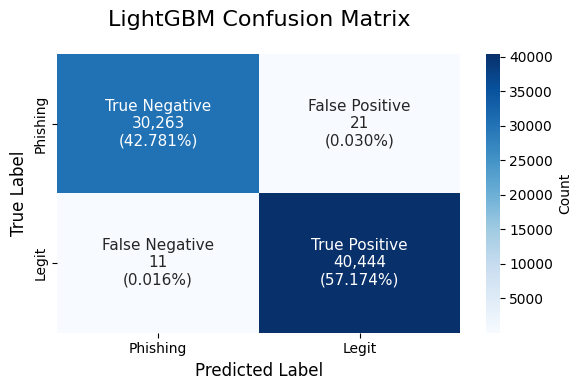

In [96]:
# Confusion Matrix
# Calculate percentages
lgbm_cm = confusion_matrix(y_test, y_pred_lgbm)
lgbm_cm_percent = lgbm_cm.astype('float') / lgbm_cm.sum() * 100

# Create custom annotations with counts, percentages, and labels
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
annotations = []

for i in range(2):
    for j in range(2):
        count = lgbm_cm[i, j]
        percentage = lgbm_cm_percent[i, j]
        label_idx = i * 2 + j
        label = labels[label_idx]
        
        # Create multi-line annotation
        annotation = f'{label}\n{count:,}\n({percentage:.3f}%)'
        annotations.append(annotation)

# Reshape annotations to match confusion matrix shape
annotations = np.array(annotations).reshape(2, 2)

# Create heatmap with custom annotations
plt.figure(figsize=(6,4))
sns.heatmap(lgbm_cm, 
           annot=annotations, 
           fmt='', 
           cmap='Blues', 
           xticklabels=['Phishing', 'Legit'], 
           yticklabels=['Phishing', 'Legit'],
           cbar_kws={'label': 'Count'},
           annot_kws={'fontsize': 11, 'ha': 'center', 'va': 'center'})
plt.title('LightGBM Confusion Matrix', fontsize=16, pad=20)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

plt.tight_layout()
plt.show()


C:\Users\erica\AppData\Local\Temp\ipykernel_37264\929159763.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_lgbm, palette='viridis') # <--- CHANGED from 'plasma' to 'viridis'


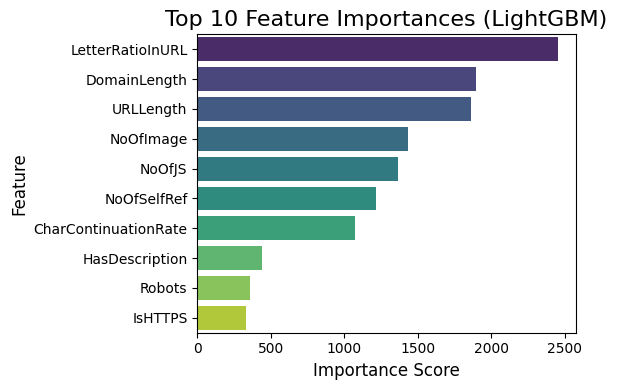

In [97]:

# Top 10 Feature Importances
numerical_features = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64'] and col != 'Language']
categorical_features = ['Language']
ohe_feature_names = best_lgbm_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, ohe_feature_names])
importances_lgbm = best_lgbm_pipeline.named_steps['classifier'].feature_importances_

importance_df_lgbm = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances_lgbm
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df_lgbm, palette='viridis') # <--- CHANGED from 'plasma' to 'viridis'
plt.title('Top 10 Feature Importances (LightGBM)', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


#### Save the model file

In [98]:
output_dir = 'model_artifacts'
model_filename_lgbm = 'phishing_detection_LGBM_model.pkl'
full_path_lgbm = os.path.join(output_dir, model_filename_lgbm)
os.makedirs(output_dir, exist_ok=True)

print(f"\nSaving the best LightGBM pipeline to '{full_path_lgbm}'...")
joblib.dump(best_lgbm_pipeline, full_path_lgbm)
print("Model saved successfully!")


Saving the best LightGBM pipeline to 'model_artifacts\phishing_detection_LGBM_model.pkl'...
Model saved successfully!


### RandomForest

In [99]:
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline that includes the preprocessor and the Random Forest classifier
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        random_state=42,
        class_weight='balanced',  # Handles imbalanced classes
        n_jobs=-1
    ))
])

# Define a smaller, efficient parameter grid for GridSearchCV
param_grid_rf = {
    'classifier__n_estimators': [200, 300],       # Number of trees in the forest
    'classifier__max_depth': [10, 20],            # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5],      # Minimum number of samples required to split a node
    'classifier__min_samples_leaf': [1, 2]        # Minimum number of samples required at a leaf node
}

# --- 2. Perform Hyperparameter Tuning ---

print("Starting Random Forest hyperparameter tuning with GridSearchCV...")
grid_search_rf = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid_rf,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Fit the grid search to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best pipeline from the search
best_rf_pipeline = grid_search_rf.best_estimator_
print("\nHyperparameter tuning complete.")
print(f"Best Random Forest parameters found: {grid_search_rf.best_params_}")
print(f"Best ROC AUC score during CV: {grid_search_rf.best_score_:.4f}\n")

# --- 3. Model Evaluation ---

# Make predictions on the test set using the best model
y_pred_rf = best_rf_pipeline.predict(X_test)
y_pred_proba_rf = best_rf_pipeline.predict_proba(X_test)[:, 1]

# Print the performance metrics in the requested format
print("--- Random Forest Model Performance on Test Set ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_rf):.4f}")
print(f"AUC-ROC:   {roc_auc_score(y_test, y_pred_proba_rf):.4f}")
print("-------------------------------------------------")
print(classification_report(y_test, y_pred, target_names=['Legit (0)', 'Phishing (1)']))



Starting Random Forest hyperparameter tuning with GridSearchCV...
Fitting 3 folds for each of 16 candidates, totalling 48 fits

Hyperparameter tuning complete.
Best Random Forest parameters found: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best ROC AUC score during CV: 1.0000

--- Random Forest Model Performance on Test Set ---
Accuracy:  0.9987
Precision: 0.9986
Recall:    0.9991
F1-Score:  0.9988
AUC-ROC:   1.0000
-------------------------------------------------
              precision    recall  f1-score   support

   Legit (0)       0.99      1.00      1.00     30284
Phishing (1)       1.00      1.00      1.00     40455

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739



#### Visualisations

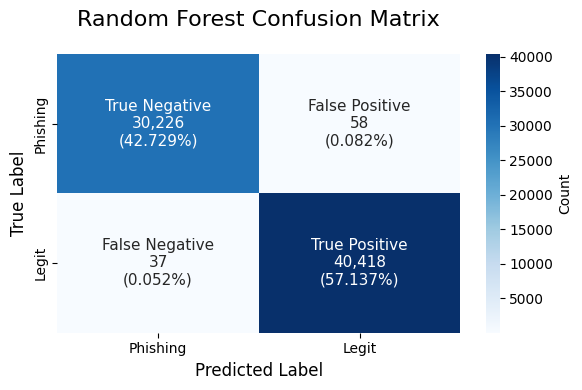

In [100]:
# Confusion Matrix
# Calculate percentages
rf_cm = confusion_matrix(y_test, y_pred_rf)
rf_cm_percent = rf_cm.astype('float') / rf_cm.sum() * 100

# Create custom annotations with counts, percentages, and labels
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
annotations = []

for i in range(2):
    for j in range(2):
        count = rf_cm[i, j]
        percentage = rf_cm_percent[i, j]
        label_idx = i * 2 + j
        label = labels[label_idx]
        
        # Create multi-line annotation
        annotation = f'{label}\n{count:,}\n({percentage:.3f}%)'
        annotations.append(annotation)

# Reshape annotations to match confusion matrix shape
annotations = np.array(annotations).reshape(2, 2)

# Create heatmap with custom annotations
plt.figure(figsize=(6,4))
sns.heatmap(rf_cm, 
           annot=annotations, 
           fmt='', 
           cmap='Blues', 
           xticklabels=['Phishing', 'Legit'], 
           yticklabels=['Phishing', 'Legit'],
           cbar_kws={'label': 'Count'},
           annot_kws={'fontsize': 11, 'ha': 'center', 'va': 'center'})
plt.title('Random Forest Confusion Matrix', fontsize=16, pad=20)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

plt.tight_layout()
plt.show()


C:\Users\erica\AppData\Local\Temp\ipykernel_37264\1393804506.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_rf, palette='viridis')


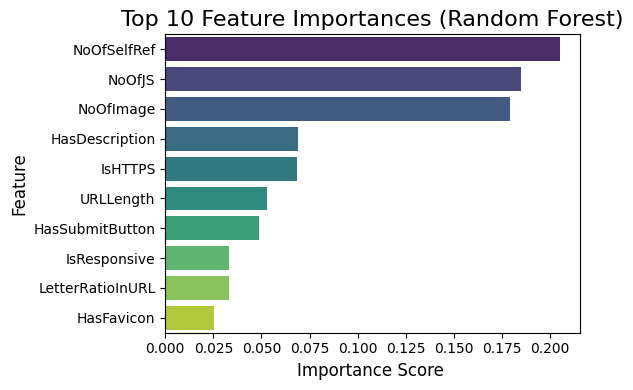

In [101]:

# Top 10 Feature Importances
numerical_features = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64'] and col != 'Language']
categorical_features = ['Language']
ohe_feature_names = best_rf_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, ohe_feature_names])
importances_rf = best_rf_pipeline.named_steps['classifier'].feature_importances_

importance_df_rf = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf, palette='viridis')
plt.title('Top 10 Feature Importances (Random Forest)', fontsize=16)
plt.xlabel('Importance Score ', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()



#### Save the model files

In [102]:
output_dir = 'model_artifacts'
model_filename_rf = 'phishing_detection_RF_model.pkl'
full_path_rf = os.path.join(output_dir, model_filename_rf)
os.makedirs(output_dir, exist_ok=True)

print(f"\nSaving the best Random Forest pipeline to '{full_path_rf}'...")
joblib.dump(best_rf_pipeline, full_path_rf)
print("Model saved successfully!")


Saving the best Random Forest pipeline to 'model_artifacts\phishing_detection_RF_model.pkl'...
Model saved successfully!
